## Prérequis

In [1]:
import sys
from bs4 import BeautifulSoup
from bs4 import BeautifulSoup as bs
from bs4.element import Comment
import urllib.request
import requests
import pandas as pd
from urllib import request
import nltk ,pprint
from nltk import word_tokenize
import re
import numpy

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
my_local_drive='/content/gdrive/MyDrive/jeuxdemots'
sys.path.append(my_local_drive)
%cd $my_local_drive

%pwd

/content/gdrive/MyDrive/jeuxdemots


'/content/gdrive/MyDrive/jeuxdemots'

# Phrase analyse

In [5]:
# url = 'http://www.jeuxdemots.org/rezo-dump.php?gotermsubmit=Chercher&gotermrel=r%E9fl%E9chir&rel='
# page = urllib.request.urlopen(url,timeout=20)
# term_1 = bs(page)
# text_1 = term_1.get_text()

In [6]:
# url = 'http://www.jeuxdemots.org/rezo-dump.php?gotermsubmit=Chercher&gotermrel=homme&rel='
# page = urllib.request.urlopen(url,timeout=20)
# term_3 = bs(page)
# text_2 = term_3.get_text()

In [7]:
## Puisque parfois l'entrée contient plus qu'un mots (par ex. "roi des animaux" devient --->   "roi+des+animaux" dans le lien)
def adaptation(term):
  list1 = []
  t=""
  for w in term : 
    list1 = term.split()
  for element in list1:
    if element!=list1[-1]:
      t=t+element+"+" 
    else:
      t=t+element
  return t

In [8]:
def get_id(text, term):
  text = term.get_text()
  id = re.search('e;(.+?);.+?;1', text).group(1)
  nom = re.search('e;.+?;(.+?);1', text).group(1)
  return id
def get_nom(text, term):
  text = term.get_text()
  id = re.search('e;(.+?);.+?;1', text).group(1)
  nom = re.search('e;.+?;(.+?);1', text).group(1)
  return nom

In [9]:
term_1 = input("Enter first word : ")
term_3 = input("Enter second word : ")
term_1 = adaptation(term_1)
term_3 = adaptation(term_3)
url = 'http://www.jeuxdemots.org/rezo-dump.php?gotermsubmit=Chercher&gotermrel='+term_1+'&rel='
page = urllib.request.urlopen(url,timeout=20)
term_1 = bs(page)
text_1 = term_1.get_text()
url = 'http://www.jeuxdemots.org/rezo-dump.php?gotermsubmit=Chercher&gotermrel='+term_3+'&rel='
page = urllib.request.urlopen(url,timeout=20)
term_3 = bs(page)
text_2 = term_3.get_text()

Enter first word : Newton
Enter second word : table


In [10]:
IdTerm_1 = get_id(text_1,term_1)
IdTerm_3 = get_id(text_2,term_3)
NomTerm_1 = get_nom(text_1,term_1)
NomTerm_3 = get_nom(text_2,term_3)
print((IdTerm_1,NomTerm_1))
print((IdTerm_3,NomTerm_3))

('62988', "'Newton'")
('89591', "'table'")


In [11]:
df_Relations=pd.read_csv("Relations.csv",sep=";")
NomRelation_2 = input("Enter Relation : ")
for i in range(161):
  if df_Relations.loc[i].Nom==NomRelation_2:
    relation_2=df_Relations.loc[i].id

relation_2

Enter Relation : r_associated


0

## Direct relations between terms

In [ ]:
dir_relations1 = re.findall('r;.+?;'+IdTerm_1+';'+IdTerm_3+';(.+?);.+', text_1)
dir_relations2 = re.findall('r;.+?;'+IdTerm_3+';'+IdTerm_1+';(.+?);.+', text_2)
dir_relations=dir_relations1+dir_relations2
print("Direct relations between  "+IdTerm_1+"  and  "+IdTerm_3+"    are   "+ str(dir_relations1))
print("Direct relations between  "+IdTerm_3+"  and  "+IdTerm_1+"    are   "+ str(dir_relations2))



Direct relations between  163590  and  87987    are   ['0', '10', '15', '666']
Direct relations between  87987  and  163590    are   []


In [ ]:
for i in range(161):
  for j in dir_relations1:
    if df_Relations.loc[i].id == int(j):
      relationsNom1=df_Relations.loc[i].Nom
      print(NomTerm_1+ " " + relationsNom1+" "+NomTerm_3)

print("\n********************************************")

for i in range(161):
  for j in dir_relations2:
    if df_Relations.loc[i].id == int(j):
      relationsNom2=df_Relations.loc[i].Nom
      print(NomTerm_3+ " " + relationsNom2+" "+NomTerm_1)

'Tour Eiffel' r_associated 'France'
'Tour Eiffel' r_holo 'France'
'Tour Eiffel' r_lieu 'France'
'Tour Eiffel' r_aki 'France'

********************************************


## Former un triangle sémantique
**Abstraitement, selon le côté du triangle que l'on considère, cela peut se faire en deux parties distinctes.**


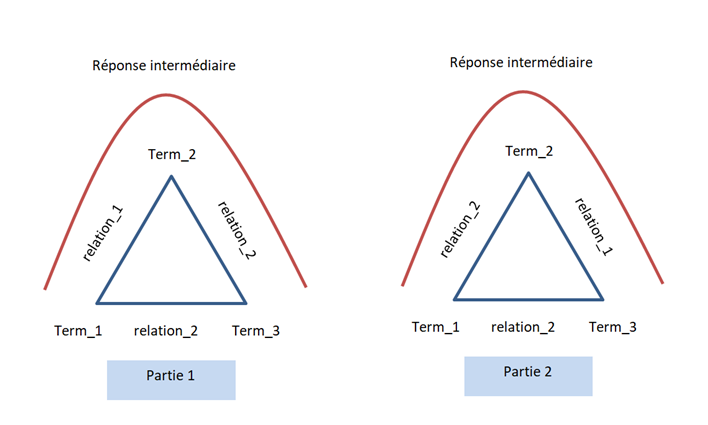

## Partie I

### récupération de tous les termes intermédiaires

In [12]:
## afficher tous les termes intremiediares qui sont reliées avec terme_1 et leur poids 
inter_terms= re.findall('r;.+?;(.+?);'+IdTerm_3+';'+str(relation_2)+';.+',text_2)
inter_r_w= list()
for i in inter_terms:
  rel_w= re.findall('r;.+?;'+IdTerm_1+';'+i+';(.+?);(.+?)\n.+',text_1)
  if rel_w==[]:
       None
  else:
    inter_r_w.append((i,rel_w))
inter_r_w

[('34898', [('9', '31'), ('0', '-15')]),
 ('44923', [('0', '20'), ('777', '9')]),
 ('135190', [('6', '27'), ('130', '25')]),
 ('16644', [('0', '15')]),
 ('115507', [('0', '20'), ('777', '9')]),
 ('104993', [('0', '25'), ('3', '25'), ('777', '9')])]

In [13]:
poids= list()

for i in inter_terms:
  termm= re.findall('r;.+?;'+IdTerm_1+';'+i+';.+?;(.+?)\n.+',text_1)
  poids.append(termm)
flat_list = list(numpy.concatenate(poids).flat)
result = list(map(int, flat_list))
max_poids = max(result)
max_poids

31

In [14]:
relation_1 = []
for term in inter_terms:
  x = re.findall('r;.+?;'+IdTerm_1+';'+term+';(.+?);'+str(max_poids)+'\n.+',text_1)  
  if x==[]:
       None
  else:
    relation_1.append(x)
relation_1 = list(numpy.concatenate(relation_1).flat)
relation_1

['9']

In [15]:
NomRelation_1 = re.search('rt;'+relation_1[0]+';(.+?);.+?;.+', text_1).group(1)
NomRelation_1

"'r_has_part'"

In [16]:
IdTerm_2 = re.search('r;.+;'+IdTerm_1+';(.+?);'+relation_1[0]+';'+str(max_poids)+'\n', text_1).group(1)
NomTerm_2 = re.search('e;'+IdTerm_2+';(.+?);1', text_1).group(1)
IdTerm_2,NomTerm_2

('81934', "'main'")

In [17]:
if inter_r_w == []:
  print("NON; Aucune inférence trouvée")
else:
  print("OUI; "+NomTerm_1+"  "+ NomRelation_1 + "  "+ NomTerm_2 +"  " + NomRelation_2 + "  " + NomTerm_3 + " avec poids égal à "+ str(max_poids))


OUI; 'Newton'  'r_has_part'  'main'  r_associated  'table' avec poids égal à 31


## Partie II

In [18]:
inter_terms= re.findall('r;.+?;'+IdTerm_1+';(.+?);'+str(relation_2)+';.+',text_1)
inter_r_w= list()
for i in inter_terms:
  rel_w= re.findall('r;.+?;'+i+';'+IdTerm_3+';(.+?);(.+?)\n.+',text_2)
  if rel_w==[]:
       None
  else:
    inter_r_w.append((i,rel_w))
inter_r_w

[('104993', [('0', '13'), ('27', '13')]),
 ('144943', [('23', '29')]),
 ('98300', [('15', '88')]),
 ('44923', [('0', '61')]),
 ('115507', [('0', '28')]),
 ('16644', [('27', '34'), ('0', '31')]),
 ('71624', [('9', '-5')]),
 ('34898', [('10', '203'), ('0', '62')])]

In [19]:
poids= list()

for i in inter_terms:
  termm= re.findall('r;.+?;'+i+';'+IdTerm_3+';.+?;(.+?)\n.+',text_2)
  poids.append(termm)
flat_list = list(numpy.concatenate(poids).flat)
result = list(map(int, flat_list))
max_poids = max(result)
max_poids


203

In [20]:
relation_1 = []
for term in inter_terms:
  x = re.findall('r;.+?;'+term+';'+IdTerm_3+';(.+?);'+str(max_poids)+'\n.+',text_2)  
  if x==[]:
       None
  else:
    relation_1.append(x)
relation_1 = list(numpy.concatenate(relation_1).flat)
relation_1

['10']

In [21]:
NomRelation_1 = re.search('rt;'+relation_1[0]+';(.+?);.+?;.+', text_1).group(1)
NomRelation_1

"'r_holo'"

In [22]:
IdTerm_2 = re.search('r;.+;(.+?);'+IdTerm_3+';'+relation_1[0]+';'+str(max_poids)+'\n', text_2).group(1)
NomTerm_2 = re.search('e;'+IdTerm_2+';(.+?);1', text_1).group(1)
IdTerm_2,NomTerm_2

('34898', "'pied'")

In [23]:
if inter_r_w == []:
  print("NON; Aucune inférence trouvée")
else:
  print("OUI; "+NomTerm_1+"  "+ NomRelation_2 + "  "+ NomTerm_2 +"  " + NomRelation_1 + "  " + NomTerm_3 + " avec poids égal à "+ str(max_poids))


OUI; 'Newton'  r_associated  'pied'  'r_holo'  'table' avec poids égal à 203


## Quelques résultats

Question1:
🦁 <--> 👑 

**pq  lion   r_syn    roi des animaux**

par parite I:

> OUI; 'lion'  'r_raff_sem'  'lion>116032'  'r_syn'  'roi des animaux' avec poids égal à 337

par partie II : 

> OUI; 'lion'  'r_syn'  'roi des animaux'  'r_lemma'  'roi des animaux' avec poids égal à 29
_____________________________________________________________________________
_____________________________________________________________________________

Question 2 : 🌍

**pq ciel  r_has_antimagn  orage?**

par partie II :

> OUI; 'ciel'  'r_has_antimagn'  'nuage'  'r_associated'  'orage' avec poids égal à 442

_____________________________________________________________________________
____________________________________________________________________________

Question 3 : 🐯  


**tigre r_carac dangereux**

I : OUI; 'tigre'  'r_isa'  'félin'  'r_carac'  'dangereux' avec poids égal à 888

II : OUI; 'tigre'  'r_carac'  'scorpion'  'r_carac'  'dangereux' avec poids égal à 644

_____________________________________________________________________________
_____________________________________________________________________________

Question 4 : 🎆

***pq carnaval r_lieu Rio de Janeiro ***

seulement par partie II:
> OUI; 'carnaval'  'r_lieu'  'Rio'  'r_locution'  'Rio de Janeiro' avec poids égal à 168
_____________________________________________________________________________
_______________________________

Question 5 :  

**Newton r_associated table**
- Pas de relation directe 

par partie I  :

>OUI; 'Newton'  'r_has_part'  'main'  'r_associated'  'table' avec poids égal à 31

par partie II :

>OUI; 'Newton'  'r_associated'  'pied'  'r_holo'  'table' avec poids égal à 203

_____________________________________________________________________________
________________________________________________________________________

Question 6 : 🍲

**pq gouter r_sentiment bonheur**

par partie I :

>OUI; 'gouter'  'r_sentiment'  'bonheur'  'r_sentiment'  'bonheur' avec poids égal à 39

par partie II :

>OUI; 'gouter'  'r_sentiment'  'bonheur'  'r_sentiment'  'bonheur' avec poids égal à 323